# 引入套件

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pip
pip.main(["install", "openpyxl", "seaborn"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: openpyxl in ./lib/python3.9/site-packages (3.1.2)

Collecting seaborn

Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

Requirement already satisfied: et-xmlfile in ./lib/python3.9/site-packages (from openpyxl) (1.1.0)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in ./lib/python3.9/site-packages (from seaborn) (3.7.1)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in ./lib/python3.9/site-packages (from seaborn) (1.24.2)

Requirement already satisfied: pandas>=0.25 in ./lib/python3.9/site-packages (from seaborn) (1.5.3)

Requirement already satisfied: cycler>=0.10 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: importlib-resources>=3.2.0 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (5.12.0)

Requirement already satisfied: pillow>=6.2.0 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (3.0.9)

Requirement already satisfied: fonttools>=4.22.0 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.39.2)

Requirement already satisfied: kiwisolver>=1.0.1 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: contourpy>=1.0.1 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.0.7)

Requirement already satisfied: packaging>=20.0 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (23.0)

Requirement already satisfied: python-dateutil>=2.7 in ./lib/python3.9/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in ./lib/python3.9/site-packages (from pandas>=0.25->seaborn) (2022.7.1)

Requirement already satisfied: zipp>=3.1.0 in ./lib/python3.9/site-packages (from importlib-resources>=3.2.0->matplotlib!=3.6.1,>=3.1->seaborn) (3.15.0)

Requirement already satisfied: six>=1.5 in ./lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

Installing collected packages: seaborn

Successfully installed seaborn-0.12.2

0

# 讀取檔案

In [9]:
#dir='./data/'
#wine=pd.read_excel(dir+"wine.xlsx")
wine = pd.read_excel("Wine.xlsx")

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# 習題 1：
# 有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

# 1.  繪製變數間的相關係數圖，以觀察變數間是否存在相關性
# <p style="color:red">因為上三角與下三角為對稱，故只取一半使畫面簡潔.</p> <p style="color:red">目前可以明顯看到最高相關係數為 Total_Phenols 與 Flavanoids = 0.864564</p>

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/1846960071.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


<Axes: >

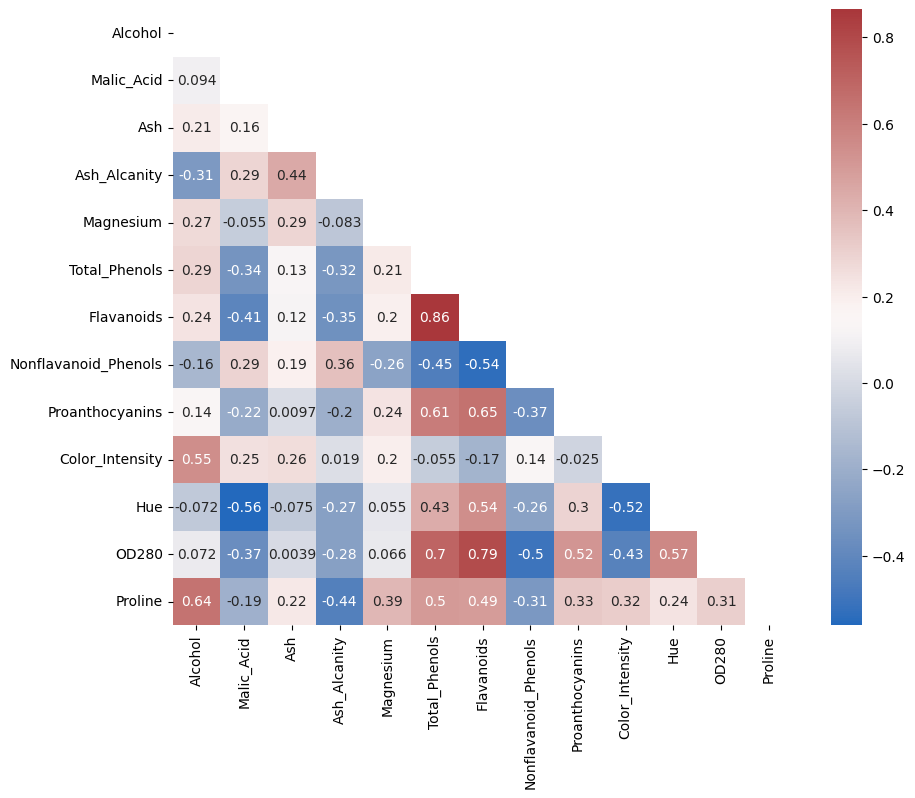

In [11]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine = pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine = wine.drop(["Customer_Segment"],axis=1)

# df=pd.DataFrame(wine)
R = wine.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask

fig , ax = plt.subplots(figsize=(10,8))
sns.heatmap(R, annot=True, mask = mask, cmap="vlag")


# <p style="color:red">逐一比對過於繁瑣，將相關係數矩陣 DataFrame 化並排序</p> <p style="color:red">可以觀察到 Total_Phenols	, Flavanoids , OD280 三個變數間相關性高	</p>

In [12]:
# 相關係數矩陣取出最高相關的關係
corr_rank = abs(R).unstack().sort_values(ascending=False).drop_duplicates()
corr_rank = pd.DataFrame(corr_rank,columns=["correlation"]).head(8)
corr_rank

correlation
Alcohol         Alcohol           1.000000
Total_Phenols   Flavanoids        0.864564
OD280           Flavanoids        0.787194
                Total_Phenols     0.699949
Proanthocyanins Flavanoids        0.652692
Proline         Alcohol           0.643720
Proanthocyanins Total_Phenols     0.612413
Hue             OD280             0.565468

# Scatter Plot Matrix
# <p style="color:red">取出前三個高度相關的變數做散佈圖矩陣</p>

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/221995478.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')
/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/221995478.py:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Z=pd.plotting.scatter_matrix(wine.loc[:,["Total_Phenols" , "Flavanoids" , "OD280"]], c=colors, ax=ax)


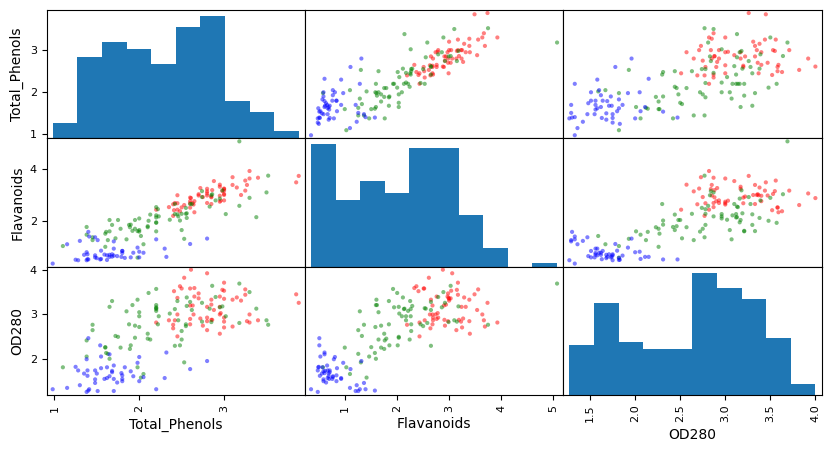

In [14]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

folder = '/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine = pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine = wine.drop(["Customer_Segment"],axis=1)
fig,ax = plt.subplots(figsize=(10,5))
colors = np.where(CustomerSegment==1, 'r', np.where(CustomerSegment==2, 'g', 'b'))
Z = pd.plotting.scatter_matrix(wine.loc[:,["Total_Phenols" , "Flavanoids" , "OD280"]], c=colors, ax=ax)


# 2. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

# Standardization: $Z_i=\frac{x_i-\mu}{\sigma}$
# <p style="color:red">這份資料在分析之前應該先做標準化，其每個變數的全域(Range)範圍相差甚大，若直接觀察盒鬚圖，無法比較不同變數間的分佈狀況，甚至因為特徵值範圍差距會影響到後續分析。</p>

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/3396604988.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


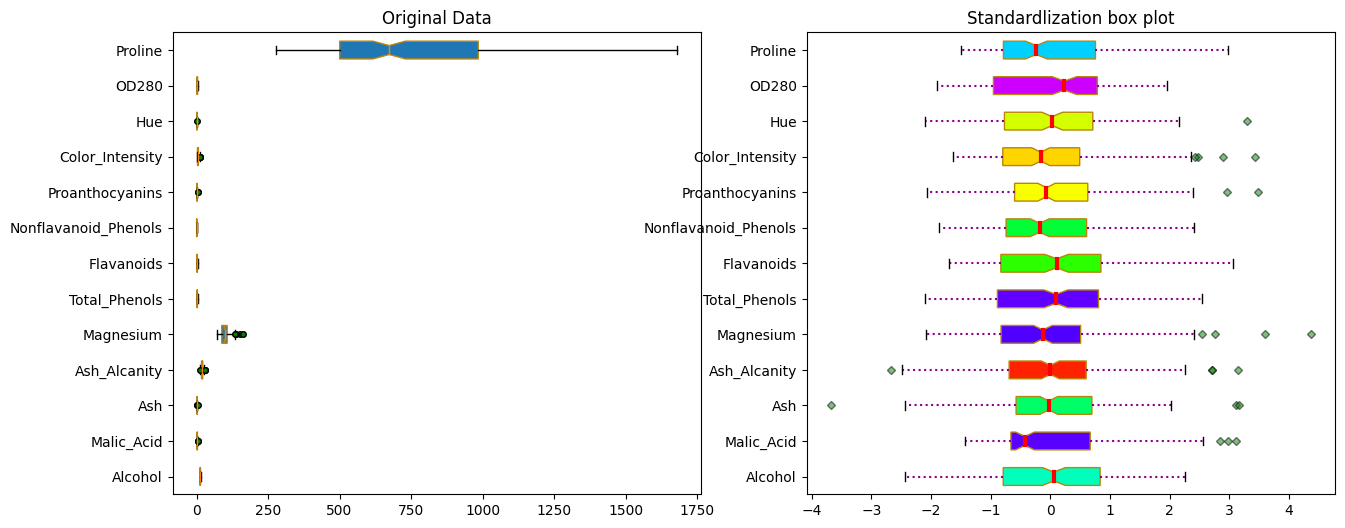

In [15]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

#--------------import pakage-------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#--------------read data-------------------

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)


#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer= StandardScaler()
Standardlizer.fit(wine)
wine_standard=Standardlizer.transform(wine)

#------------plot------------------
fig , ax =plt.subplots(1,2,figsize=(15,6))

boxprops=dict(linestyle='--' , linewidth=1 , color="darkgoldenrod")
flierprops=dict(marker="o",markerfacecolor='green',markersize=4,linestyle='none')
bp=ax[0].boxplot(wine,boxprops=boxprops,flierprops=flierprops,vert=False, patch_artist = True,
                notch ='True',labels=wine.columns)
ax[0].set_title("Original Data")

bp=ax[1].boxplot(wine_standard,boxprops=boxprops,flierprops=flierprops,vert=False, patch_artist = True,
                notch ='True',labels=wine.columns)
# bp = ax.boxplot(wine_standard, patch_artist = True,
#                 notch ='True', vert = 0)

n=13
colors = np.random.rand(n)
c = plt.cm.gist_rainbow(colors)

 
for patch, color in zip(bp['boxes'], c):
    patch.set_facecolor(color)
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
# for cap in bp['caps']:
#     cap.set(color ='#8B008B',
#             linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
# Adding title
ax[1].set_title("Standardlization box plot")
 
# Removing top axes and right axes
# ticks
ax[1].get_xaxis().tick_bottom()
ax[1].get_yaxis().tick_left()
     
# show plot
plt.show()   

# min-max scaling
# $S_i=\frac{x_i-min(x_i)}{max(x_i) - min(x_i)}$ , scaling in [0,1]

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/1110675274.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


Text(0.5, 1.0, 'Normalize Data')

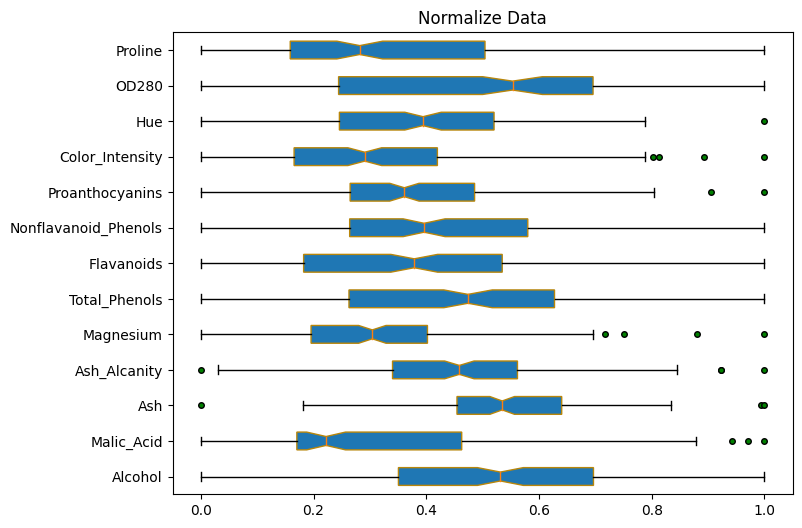

In [17]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

#--------------import pakage-------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#--------------read data-------------------

folder = '/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine = pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine = wine.drop(["Customer_Segment"],axis=1)

#-----------normalize------------
min_wine = np.min(wine,axis=0)
max_wine = np.max(wine,axis=0)
Normalize_wine = (wine-min_wine)/(max_wine-min_wine)


#------------plot------------------
fig, ax = plt.subplots(figsize=(8,6))

boxprops = dict(linestyle='--' , linewidth=1 , color="darkgoldenrod")
flierprops = dict(marker="o",markerfacecolor='green',markersize=4,linestyle='none')
bp = ax.boxplot(Normalize_wine,boxprops=boxprops,flierprops=flierprops,vert=False, patch_artist = True,
                notch ='True',labels=wine.columns)
ax.set_title("Normalize Data")

# 3. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。
# Alcohol 特徵值最高，其解釋變異程度最好

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/2872753733.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')
/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/2872753733.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(wine.columns[idx], rotation=90)


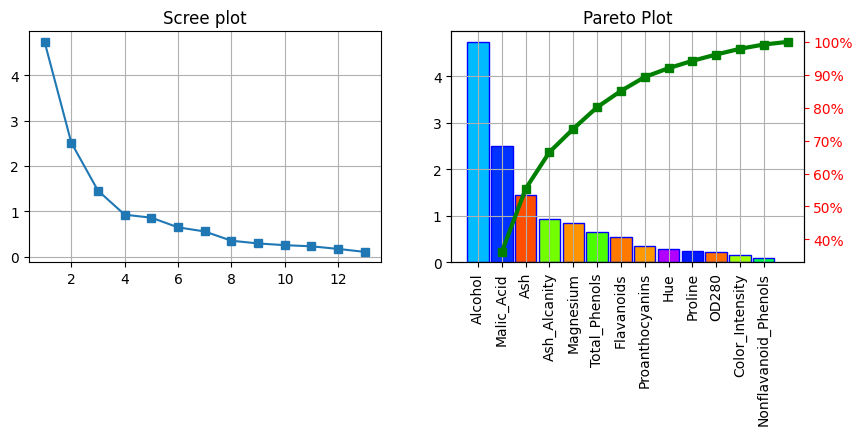

In [18]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler

folder = '/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine = pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine = wine.drop(["Customer_Segment"],axis=1)
Standardlizer = StandardScaler()
Standardlizer.fit(wine)
wine_standard = Standardlizer.transform(wine)
 

Sx_wine = np.cov(wine_standard.T , bias=False)
w, v = eig(Sx_wine)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T


from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(1,2,figsize=(10,3))
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker="s")
ax[0].set_title("Scree plot")
ax[0].grid(True)


eigvals_name = wine.columns[idx]
colors = np.random.rand(1+len(eigvals))
c = plt.cm.gist_rainbow(colors)
# ax[1].bar(x, eigvals,width=0.9, color = c, edgecolor = 'b' )
ax[1].bar(eigvals_name, eigvals, width=0.9, color=c, edgecolor='b')
ax[1].set_xticklabels(wine.columns[idx], rotation=90)


# ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker="s", color="g", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].grid()
ax[1].set_title("Pareto Plot")
# ax.set_xlabel(’Principal Component’)
# ax.set_ylabel(’Variance Explained’)
plt.rcParams['axes.axisbelow'] = True
plt.show()


# 4. 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。
# 可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

# <p style="color:red">未標準化直接進行主成分分析: 變數之間變異程度不同，影響到特徵值與特徵向量計算，進而影響主成份的估計。</p>

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/2812356642.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


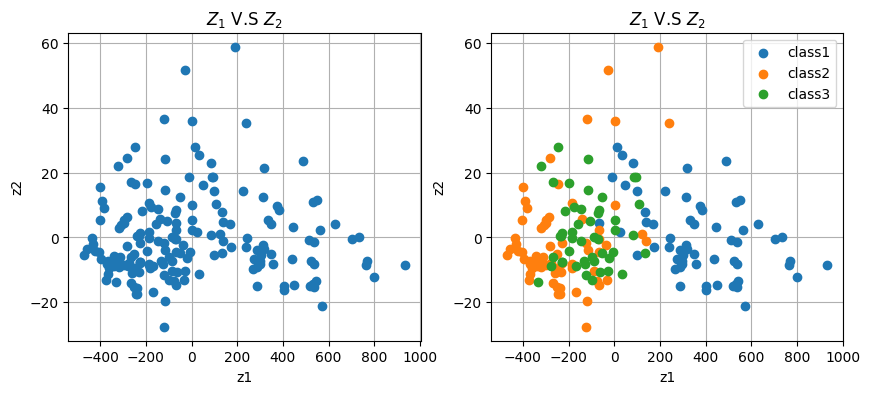

In [19]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


folder = '/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine = pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine = wine.drop(["Customer_Segment"],axis=1)
pca = PCA(n_components=2)
pca.fit(wine)
X = pca.transform(wine)
X = pd.DataFrame(X)

fig, ax = plt.subplots(1,2,figsize=(10,4))


ax[0].scatter(X[0],X[1])
ax[0].set_xlabel('z1')
ax[0].set_ylabel('z2')
ax[0].grid()
ax[0].set_title("$Z_1$ V.S $Z_2$")



class_1 = X.loc[CustomerSegment==1]
class_2 = X.loc[CustomerSegment==2]
class_3 = X.loc[CustomerSegment==3]
ax[1].scatter(class_1[0],class_1[1],label="class1")
ax[1].scatter(class_2[0],class_2[1],label="class2")
ax[1].scatter(class_3[0],class_3[1],label="class3")
ax[1].legend()
ax[1].set_xlabel('z1')
ax[1].set_ylabel('z2')
ax[1].grid()
ax[1].set_title("$Z_1$ V.S $Z_2$")
plt.rcParams['axes.axisbelow'] = True

# 
# <p style="color:red">標準化後其特徵值尺度相同，主成份分析未受到原變數變異程度影響，分類效果較佳</p>

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

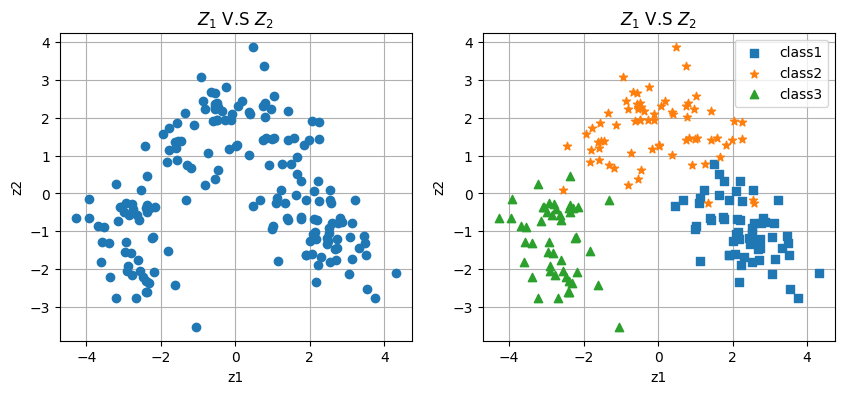

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

folder = '/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine = pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine = wine.drop(["Customer_Segment"],axis=1)

Standardize = StandardScaler()
Standardize.fit(wine)
wine_standard = Standardize.transform(wine)

pca = PCA(n_components=2)
pca.fit(wine_standard)
X = pca.transform(wine_standard)
X = pd.DataFrame(X)

fig, ax = plt.subplots(1,2,figsize=(10,4))


ax[0].scatter(X[0],X[1])
ax[0].set_xlabel('z1')
ax[0].set_ylabel('z2')
ax[0].grid()
ax[0].set_title("$Z_1$ V.S $Z_2$")


markers = ["." , "," , "o" , "v" , "^" , "<", ">",'*']
class_1 = X.loc[CustomerSegment==1]
class_2 = X.loc[CustomerSegment==2]
class_3 = X.loc[CustomerSegment==3]
ax[1].scatter(class_1[0],class_1[1],label="class1",marker=markers[1])
ax[1].scatter(class_2[0],class_2[1],label="class2",marker=markers[-1])
ax[1].scatter(class_3[0],class_3[1],label="class3",marker=markers[4])
ax[1].legend()
ax[1].set_xlabel('z1')
ax[1].set_ylabel('z2')
ax[1].grid()
ax[1].set_title("$Z_1$ V.S $Z_2$")
plt.rcParams['axes.axisbelow'] = True
pca.components_



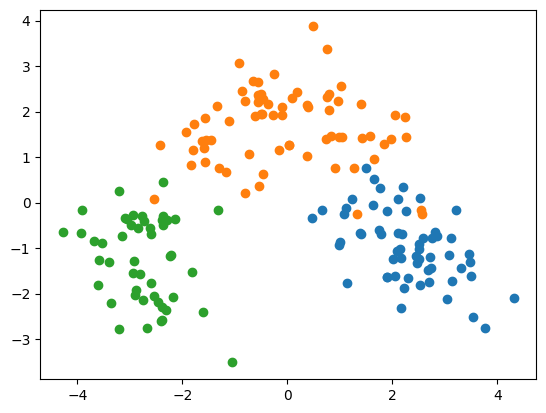

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(wine_standard)
X = pca.transform(wine_standard)
X = pd.DataFrame(X)

n = 3

# 建立一個空列表來儲存所有類別的資料
classes = []

# 將每個類別的資料存入列表中
for i in range(1, n+1):
    classes.append(X.loc[CustomerSegment==i])

# 使用迴圈來繪製所有類別的資料點
for i in range(n):
    plt.scatter(classes[i][0], classes[i][1])

# 5. 如果採三個主成分，則可繪製如立體圖。
# 觀察立體圖是否比平面圖具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

# 未標準化3d圖

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/1242512859.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


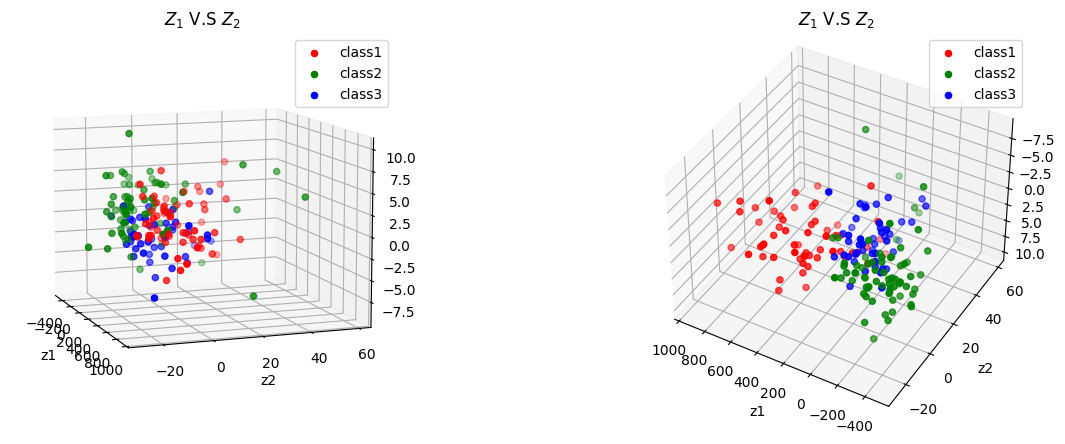

In [22]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)

# Standardize=StandardScaler()
# Standardize.fit(wine)
# wine_standard=Standardize.transform(wine)



pca = PCA(n_components=3)
pca.fit(wine)
X = pca.transform(wine)
X=pd.DataFrame(X)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), subplot_kw={'projection': '3d'})

class_1=X.loc[CustomerSegment==1]
class_2=X.loc[CustomerSegment==2]
class_3=X.loc[CustomerSegment==3]

axs[0].scatter(class_1[0],class_1[1],class_1[2],c="r",label="class1")
axs[0].scatter(class_2[0],class_2[1],class_2[2],c="g",label="class2")
axs[0].scatter(class_3[0],class_3[1],class_3[2],c="b",label="class3")
axs[0].legend()
axs[0].set_xlabel('z1')
axs[0].set_ylabel('z2')
axs[0].grid()
axs[0].set_title("$Z_1$ V.S $Z_2$")
axs[0].view_init(10,-20)

axs[1].scatter(class_1[0],class_1[1],class_1[2],c="r",label="class1")
axs[1].scatter(class_2[0],class_2[1],class_2[2],c="g",label="class2")
axs[1].scatter(class_3[0],class_3[1],class_3[2],c="b",label="class3")
axs[1].legend()
axs[1].set_xlabel('z1')
axs[1].set_ylabel('z2')
axs[1].grid()
axs[1].set_title("$Z_1$ V.S $Z_2$")

axs[1].view_init(-140, 60)


# 標準化後 3d 圖，其分類能力隨著增加主成份數量上升，解釋變異占比增加使新資料能解釋原始資料的程度變好

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/1025844555.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


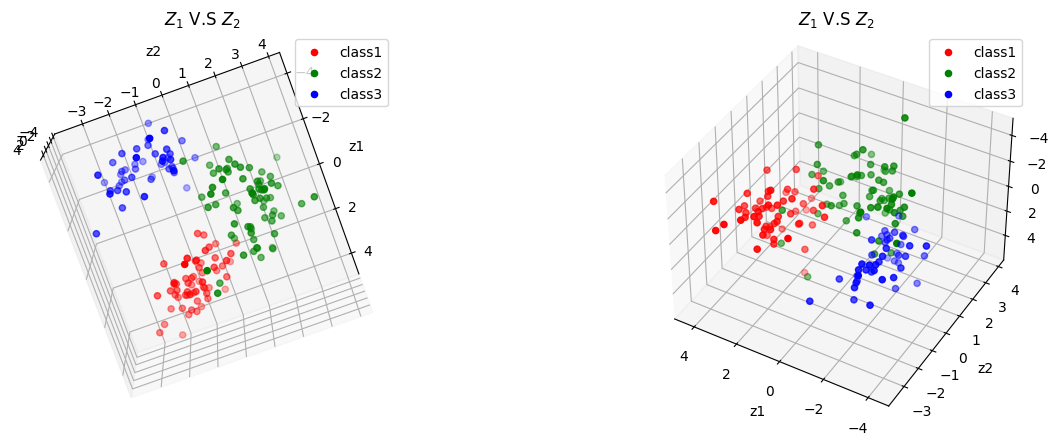

In [23]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)

Standardize=StandardScaler()
Standardize.fit(wine)
wine_standard=Standardize.transform(wine)



pca = PCA(n_components=3)
pca.fit(wine_standard)
X = pca.transform(wine_standard)
X=pd.DataFrame(X)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), subplot_kw={'projection': '3d'})

class_1=X.loc[CustomerSegment==1]
class_2=X.loc[CustomerSegment==2]
class_3=X.loc[CustomerSegment==3]

axs[0].scatter(class_1[0],class_1[1],class_1[2],c="r",label="class1")
axs[0].scatter(class_2[0],class_2[1],class_2[2],c="g",label="class2")
axs[0].scatter(class_3[0],class_3[1],class_3[2],c="b",label="class3")
axs[0].legend()
axs[0].set_xlabel('z1')
axs[0].set_ylabel('z2')
axs[0].grid()
axs[0].set_title("$Z_1$ V.S $Z_2$")
axs[0].view_init(100,-20)

axs[1].scatter(class_1[0],class_1[1],class_1[2],c="r",label="class1")
axs[1].scatter(class_2[0],class_2[1],class_2[2],c="g",label="class2")
axs[1].scatter(class_3[0],class_3[1],class_3[2],c="b",label="class3")
axs[1].legend()
axs[1].set_xlabel('z1')
axs[1].set_ylabel('z2')
axs[1].grid()
axs[1].set_title("$Z_1$ V.S $Z_2$")

axs[1].view_init(-140, 60)


特徵值占比: [0.36198848 0.1920749  0.11123631]
特徵值: [4.73243698 2.51108093 1.45424187]
特徵向量: [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


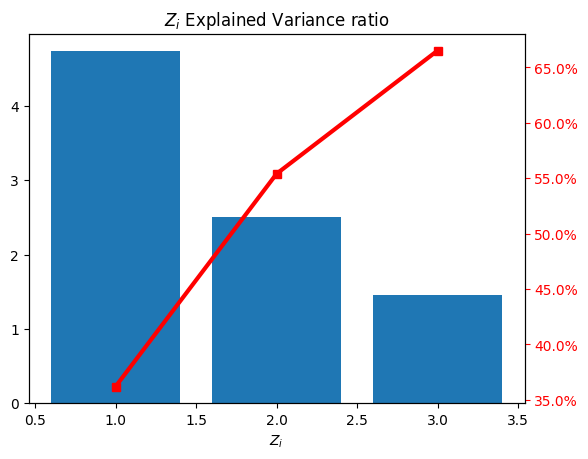

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)

Standardize=StandardScaler()
Standardize.fit(wine)
wine_standard=Standardize.transform(wine)

pca = PCA(n_components=3)
pca.fit(wine_standard)
X = pca.transform(wine_standard)
X=pd.DataFrame(X)


print("特徵值占比:",pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
print("特徵值:",pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
print("特徵向量:",pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eig_ratio = pca.explained_variance_ratio_
eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column 
eig_index=np.arange(1,1+len(eigvals),1)

fig , ax =plt.subplots()
ax.bar(x=eig_index , height=eigvals)
ax2 = ax.twinx()
ax2.plot(eig_index, eig_ratio.cumsum()*100, \
marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title("$Z_i$ Explained Variance ratio")
ax.set_xlabel("$Z_i$")
plt.show()


# 6. $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，
# 可否從 $Z_1$ 與 $Z_2$ 的組成係數，如式 (10)，看出原變數哪個比較重要？
# 哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

## $Z_1 = v_1(1)X_1 + v_1(2)X_2 + \cdots + v_1(p)X_p  \quad 式(10)$
## <p style="color:red">可以從 eigenvector 中組成 $Z_i$的係數得出哪個原變數對新變數$Z_i$的影響程度，$X_i$變動程度，flavanoids 影響最大，而這些eigencector亦可重組成原始資料的共變異數矩陣，共變異數矩陣其實就是的轉換相關係數矩陣，故可以其中訊息應該是一樣的。</p>

特徵值占比: [0.36198848 0.1920749 ]
特徵值: [4.73243698 2.51108093]
特徵向量: [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


<BarContainer object of 13 artists>

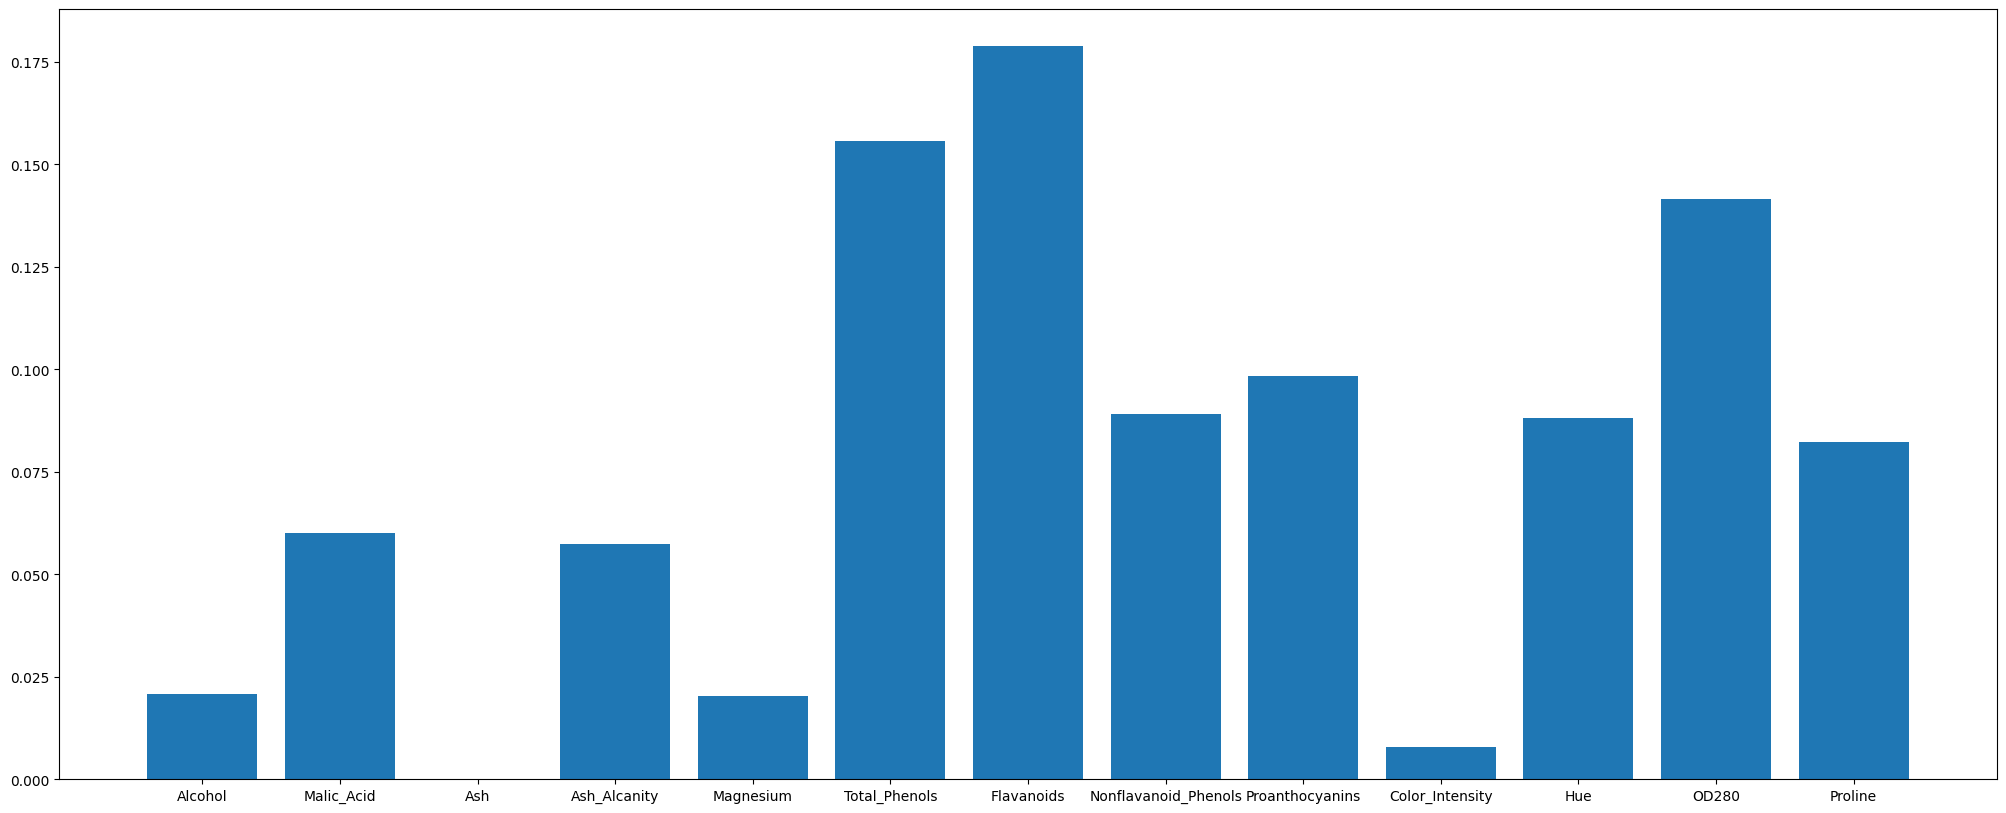

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)

Standardize=StandardScaler()
Standardize.fit(wine)
wine_standard=Standardize.transform(wine)

pca = PCA(n_components=2)
pca.fit(wine_standard)
X = pca.transform(wine_standard)
X=pd.DataFrame(X)


print("特徵值占比:",pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
print("特徵值:",pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
print("特徵向量:",pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eig_ratio = pca.explained_variance_ratio_
eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column 
eig_index=np.arange(1,1+len(eigvals),1)

loadings = pca.components_[0].reshape((13,))
importance = (loadings ** 2)


# fig ,ax =plt.subplots(figsize=(25,10))
eig_index= wine.columns
# ax.bar(x=eig_index , height=abs(eigvecs[:,0]))

fig ,ax =plt.subplots(figsize=(25,10))
eig_index= wine.columns
ax.bar(x=eig_index , height=importance)

# 計算樣本共變異矩陣 $S_x$ 的特徵值及相對的特徵向量。觀察特徵值的大小分佈，是否與兩變數間的相關程度有關？觀察特徵向量 $v_1$, $v_2$ 的關係，是否存在 orthogonal 的關係？即 $v^T_1 \cdot v_2 = 0$ ？

## 註: 當在計算 $v_1$ 和 $v_2$ 時，使用的是近似的浮點數表示，而不是精確的數值，因此在計算 dot product 時可能會出現非常小的數值誤差，從而導致不等於 0 的結果。
## 這個誤差通常是很小的，可以被認為是 0。你可以將判斷誤差的閾值設為一個很小的值，如 1e-15，如果是，則可以將它視為垂直的。

In [26]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)
Standardlizer= StandardScaler()
Standardlizer.fit(wine)
wine_standard=Standardlizer.transform(wine)


Sx_wine=np.cov(wine_standard.T , bias=False)
w, v = eig(Sx_wine)
idx=np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sx = eigvecs @ np.diag(eigvals) @ eigvecs.T

# 得到特徵向量v1, v2
eig_vals, eig_vecs = np.linalg.eig(Sx)
v1 = eig_vecs[:,0]
v2 = eig_vecs[:,1]

# 檢查v1和v2是否垂直
print("v1.T @ v2 = ", v1.T @ v2)
print(v1.T @ v2 < 1e-5)

v1.T @ v2 =  -1.914726800239622e-16
True


/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/804663717.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


#  假設樣本共變異矩陣 $S_x$ 的特徵值為 $\lambda_1$ , $\lambda_2$，相對的特徵向量為 $v_1$ ,  $v_2$。
# 驗證 $S_x = \lambda_1 v_1^Tv_1 + \lambda_2 v_2^Tv_2$


In [27]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler

folder='/Users/guoyixuan/Documents/pythoncode/ccwmachine/'
wine=pd.read_excel(folder+"wine.xlsx")
CustomerSegment = wine["Customer_Segment"]
wine=wine.drop(["Customer_Segment"],axis=1)
Standardlizer= StandardScaler()
Standardlizer.fit(wine)
wine_standard=Standardlizer.transform(wine)


Sx_wine=np.cov(wine_standard.T , bias=False)
w, v = eig(Sx_wine)
idx=np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sx = eigvecs @ np.diag(eigvals) @ eigvecs.T

print("兩矩陣是否在理論上相同:",np.allclose(Sx_wine, Sx))

兩矩陣是否在理論上相同: True


/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/1036838413.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


# Part II: 資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。
# 量測變數 30 個，樣本數 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。

# 資料引入及前處理

In [28]:

from IPython import get_ipython
get_ipython().magic('reset -sf')

import pandas as pd
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

df_breast_cancer.head(8)

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/3579650980.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0


In [29]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# 1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性
# 變數過多，文字擁擠

/var/folders/3b/ld60zrzn5jj2y4n55y8bf6r80000gn/T/ipykernel_74917/652908974.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


<Axes: >

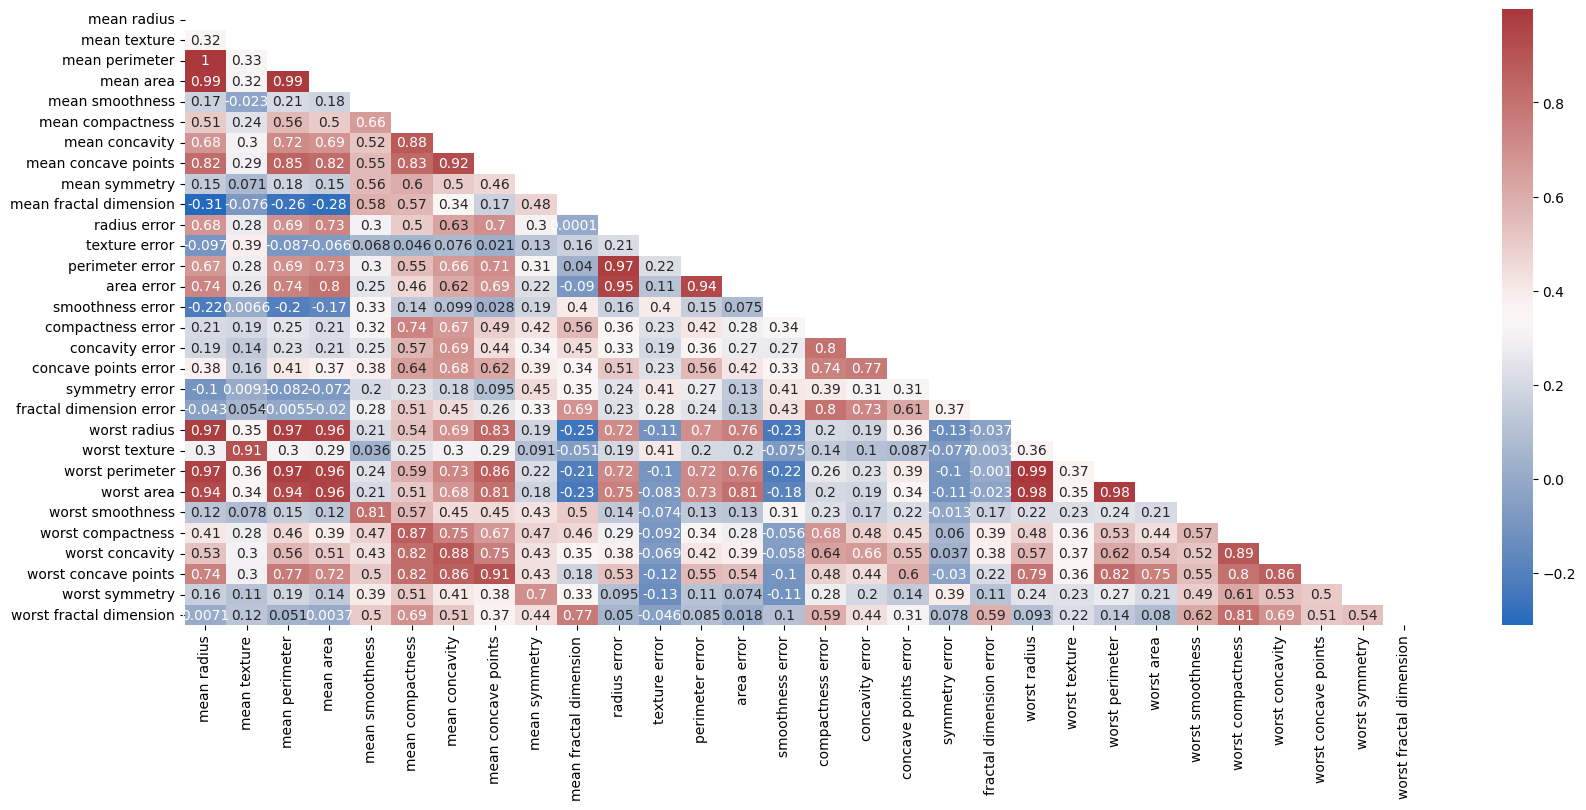

In [30]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer



breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

# df=pd.DataFrame(wine)
R=df_breast_cancer_X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask

fig , ax =plt.subplots(figsize=(20,8))
sns.heatmap(R, annot=True, mask = mask, cmap="vlag")


#  解決辦法: 只萃取出想要觀察的相關係數範圍
# 低度相關: $\vert r \vert < 0.4$
# 中度相關: $0.4<\vert r \vert < 0.7$
# 高度相關: $0.7<\vert r \vert < 1$
# 由原本的30X30 減少到 72 格

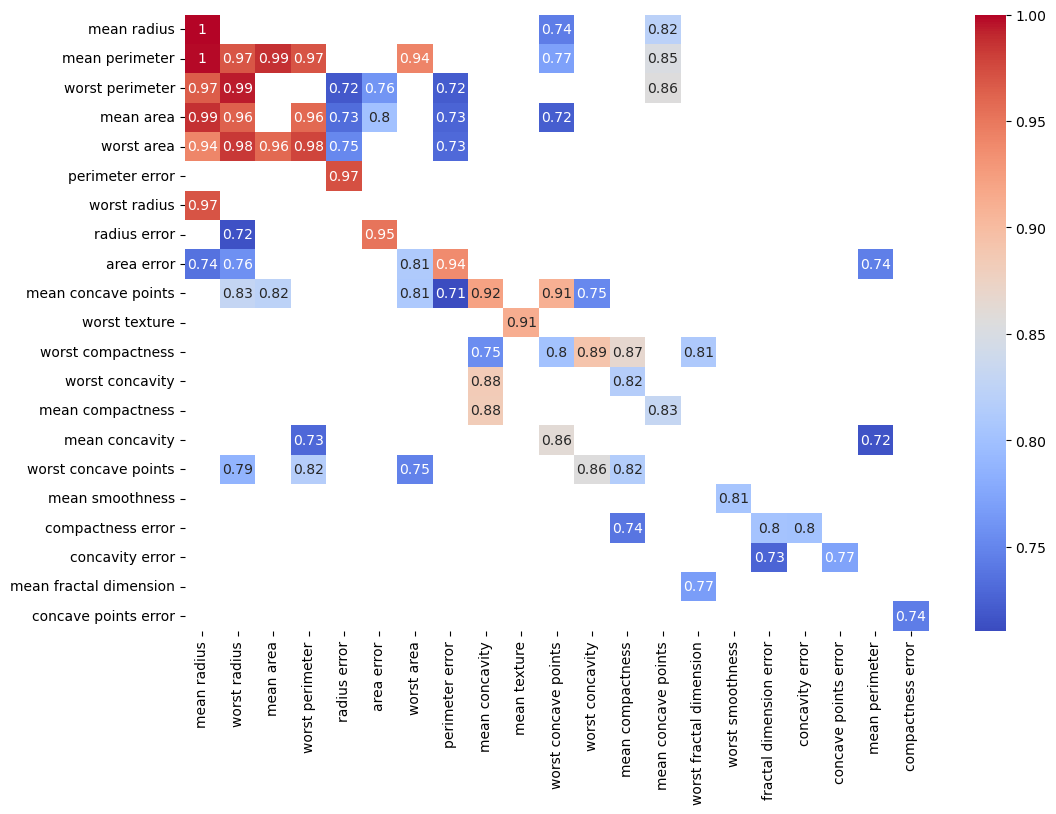

(72,)

In [145]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer



breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)



# 找出相關係數大於0.7的行列
corr = df_breast_cancer_X.corr()
high_corr = corr[abs(corr) > 0.7]

high_corr = high_corr.unstack().sort_values(ascending=False).drop_duplicates()

fig , ax =plt.subplots(figsize=(12,8))
# 繪製相關係數熱度圖
sns.heatmap(high_corr.unstack(), annot=True, cmap="coolwarm")
plt.show()
high_corr.shape

# 可以得到最高相關程度
# ean perimeter     與   mean radius        =    0.997855
# worst perimeter     與  worst radius        =   0.993708

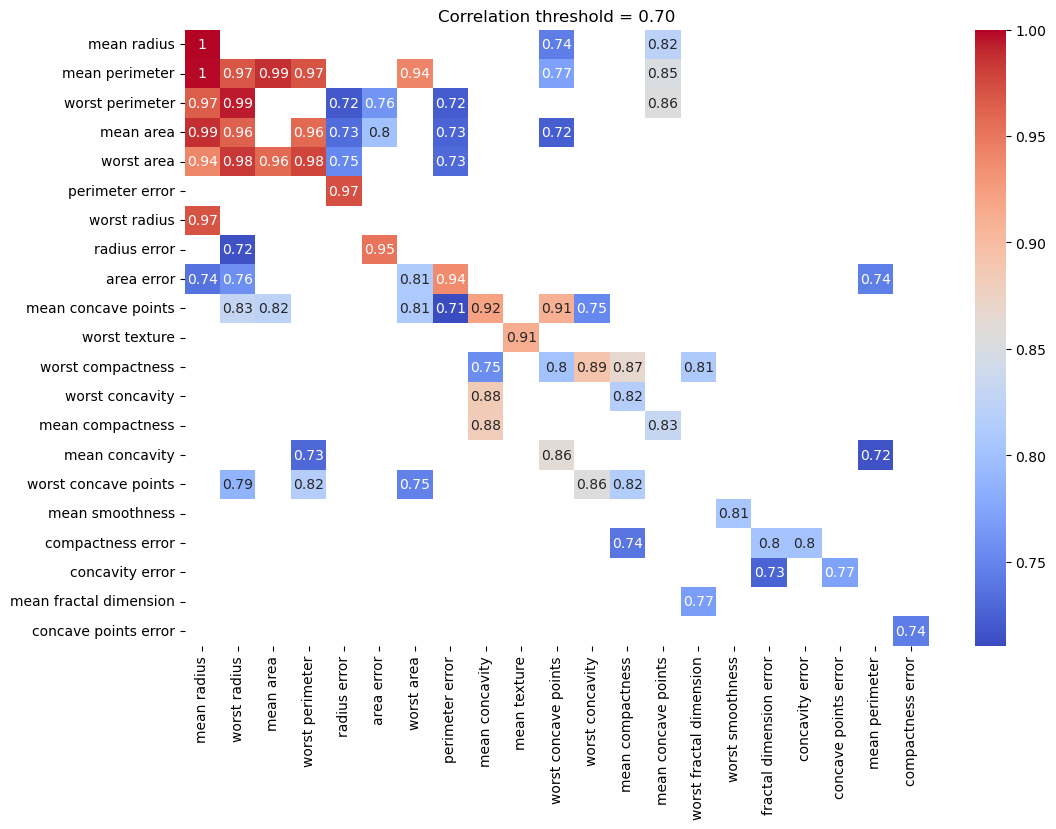

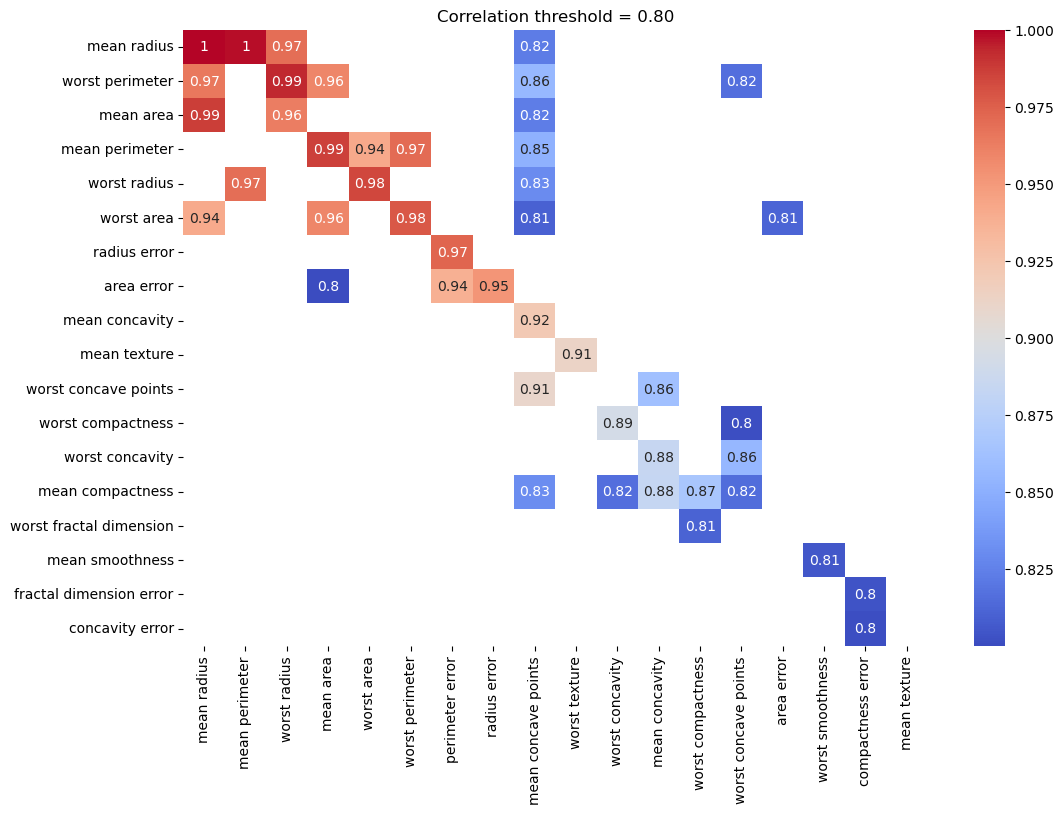

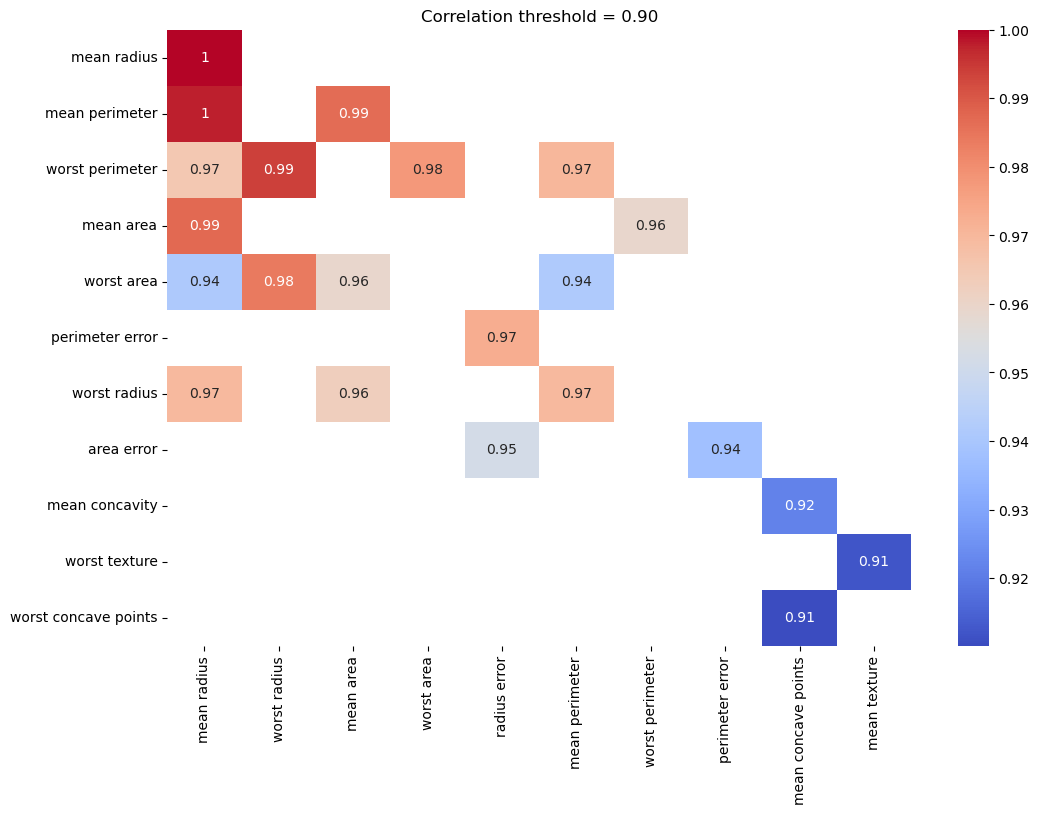

mean radius           mean radius            1.000000
mean perimeter        mean radius            0.997855
worst perimeter       worst radius           0.993708
mean area             mean radius            0.987357
mean perimeter        mean area              0.986507
worst area            worst radius           0.984015
worst perimeter       worst area             0.977578
perimeter error       radius error           0.972794
worst perimeter       mean perimeter         0.970387
worst radius          mean radius            0.969539
                      mean perimeter         0.969476
worst perimeter       mean radius            0.965137
worst radius          mean area              0.962746
worst area            mean area              0.959213
mean area             worst perimeter        0.959120
area error            radius error           0.951830
worst area            mean perimeter         0.941550
                      mean radius            0.941082
area error            perime

In [146]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import time
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer



breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)
# 找出相關係數大於0.7的行列
corr = df_breast_cancer_X.corr()


for corr_thresh in np.arange(0.7, 0.9, 0.1):
    # 找出相關係數大於 corr_thresh 的行列
    high_corr = corr[abs(corr) > corr_thresh]
    high_corr = high_corr.unstack().sort_values(ascending=False).drop_duplicates()
    
    # 繪製相關係數熱度圖
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(high_corr.unstack(), annot=True, cmap="coolwarm" )    
    plt.title(f"Correlation threshold = {corr_thresh:.2f}")
    plt.show()
    
    # 延遲 1 秒鐘
    time.sleep(0.5)
high_corr

# 解決辦法: 將相關係數轉為距離的概念，近的分成一群

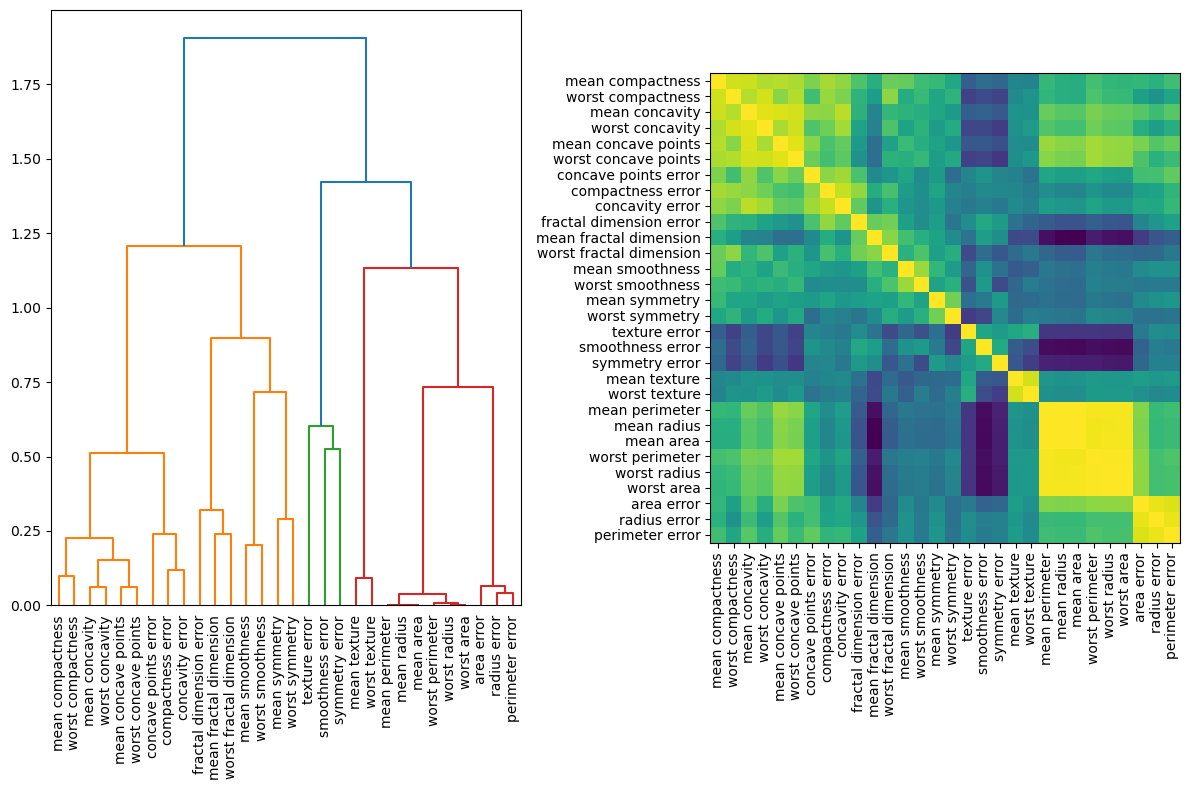

In [147]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
from sklearn.datasets import load_breast_cancer


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(breast_cancer_X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1- np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=breast_cancer.feature_names.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

# 2. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。
## <p style="color:red">變數尺度之間存在顯著差距，標準化後除了降低尺度對特徵值影響，亦能觀察到這份資料每個變數都有許多離群值。</p>

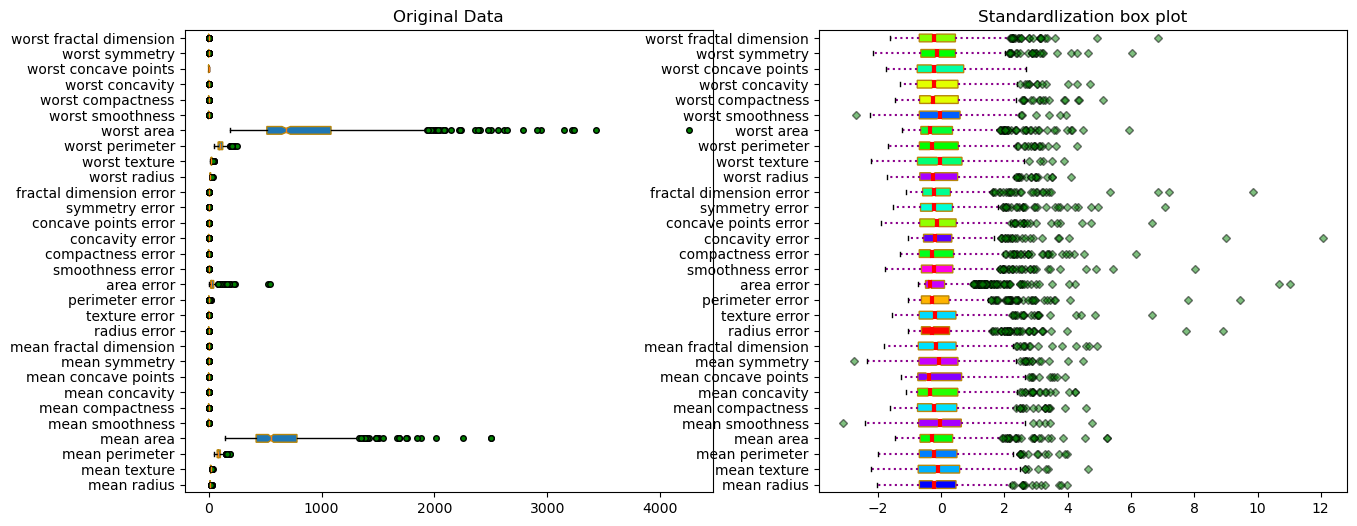

In [148]:
 from IPython import get_ipython
get_ipython().magic('reset -sf')

#--------------import pakage-------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)


#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer= StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard=Standardlizer.transform(breast_cancer_X)

#------------plot------------------
fig , ax =plt.subplots(1,2,figsize=(15,6))

boxprops=dict(linestyle='--' , linewidth=1 , color="darkgoldenrod")
flierprops=dict(marker="o",markerfacecolor='green',markersize=4,linestyle='none')
bp=ax[0].boxplot(breast_cancer_X,boxprops=boxprops,flierprops=flierprops,vert=False, patch_artist = True,
                notch ='True',labels=df_breast_cancer_X.columns)
ax[0].set_title("Original Data")

bp=ax[1].boxplot(breast_cancer_standard,
                 boxprops=boxprops,
                 flierprops=flierprops,
                 vert=False, 
                 patch_artist = True,
                 notch ='True',
                 labels=df_breast_cancer_X.columns)
# bp = ax.boxplot(wine_standard, patch_artist = True,
#                 notch ='True', vert = 0)

n=30
colors = np.random.rand(n)
c = plt.cm.gist_rainbow(colors)

 
for patch, color in zip(bp['boxes'], c):
    patch.set_facecolor(color)
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
# for cap in bp['caps']:
#     cap.set(color ='#8B008B',
#             linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
# Adding title
ax[1].set_title("Standardlization box plot")
 
# Removing top axes and right axes
# ticks
ax[1].get_xaxis().tick_bottom()
ax[1].get_yaxis().tick_left()
     
# show plot
plt.show()   

# 3. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。
# mean radius 特徵值最高，其解釋變異程度最好

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3692\3993313122.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(df_breast_cancer_X.columns[idx], rotation=90)


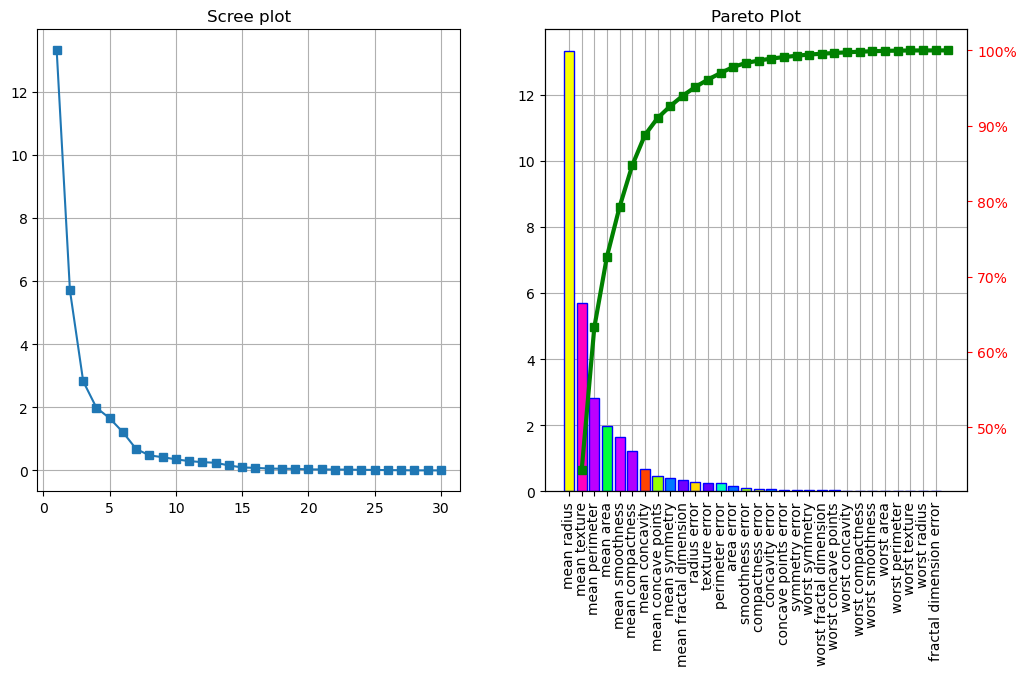

In [149]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer = StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard = Standardlizer.transform(breast_cancer_X)

#-----------共變異數矩陣------------------------------

Sx_breast = np.cov(breast_cancer_standard.T , bias=False)
w, v = eig(Sx_breast)
idx=np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T
eigvals_name = df_breast_cancer_X.columns[idx]

#--------------------------------------------------
from matplotlib.ticker import PercentFormatter
fig,ax=plt.subplots(1,2,figsize=(12,6))

x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker="s")
ax[0].set_title("Scree plot")
ax[0].grid(True)

x = np.arange(1, 1+len(eigvals))
colors = np.random.rand(1+len(eigvals))
c = plt.cm.gist_rainbow(colors)
ax[1].bar(eigvals_name, eigvals, width=0.8, color=c, edgecolor='b')
ax[1].set_xticklabels(df_breast_cancer_X.columns[idx], rotation=90)


# ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker="s", color="g", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
# ax[1].grid()
# ax.set_xlabel(’Principal Component’)
# ax.set_ylabel(’Variance Explained’)
ax[1].set_title("Pareto Plot")
ax[1].grid()

plt.show()
#eigvals_name , df_breast_cancer_X.columns

# 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。
# 資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別
# 未做標準化

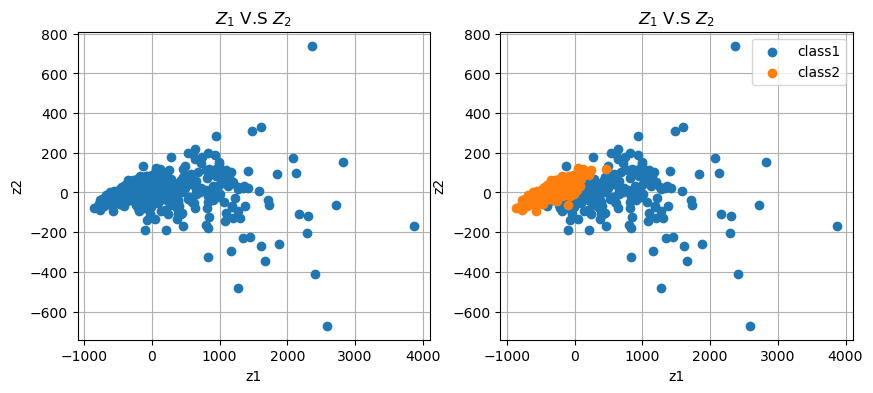

In [150]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer = StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard = Standardlizer.transform(breast_cancer_X)

pca = PCA(n_components=2)
pca.fit(breast_cancer_X)
X = pca.transform(breast_cancer_X)
X=pd.DataFrame(X)

fig , ax= plt.subplots(1,2,figsize=(10,4))


ax[0].scatter(X[0],X[1])
ax[0].set_xlabel('z1')
ax[0].set_ylabel('z2')
ax[0].grid()
ax[0].set_title("$Z_1$ V.S $Z_2$")



class_1=X.loc[breast_cancer_y==0]
class_2=X.loc[breast_cancer_y==1]
ax[1].scatter(class_1[0],class_1[1],label="class1")
ax[1].scatter(class_2[0],class_2[1],label="class2")
ax[1].legend()
ax[1].set_xlabel('z1')
ax[1].set_ylabel('z2')
ax[1].grid()
ax[1].set_title("$Z_1$ V.S $Z_2$")
plt.rcParams['axes.axisbelow'] = True

# 標準化後
# 稍微改善分類能力

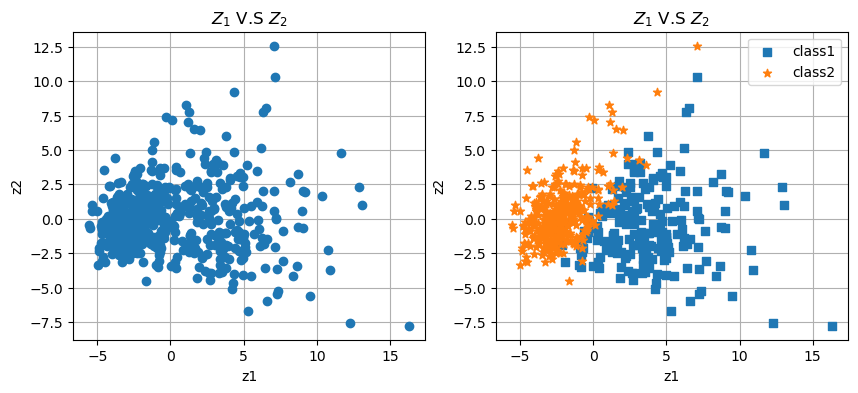

In [154]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer = StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard = Standardlizer.transform(breast_cancer_X)

pca = PCA(n_components=2)
pca.fit(breast_cancer_standard)
X = pca.transform(breast_cancer_standard)
X=pd.DataFrame(X)

fig , ax= plt.subplots(1,2,figsize=(10,4))


ax[0].scatter(X[0],X[1])
ax[0].set_xlabel('z1')
ax[0].set_ylabel('z2')
ax[0].grid()
ax[0].set_title("$Z_1$ V.S $Z_2$")



class_1=X.loc[breast_cancer_y==0]
class_2=X.loc[breast_cancer_y==1]


ax[1].set_xlabel('z1')
ax[1].set_ylabel('z2')
ax[1].grid()
ax[1].set_title("$Z_1$ V.S $Z_2$")


markers = ["." , "," , "o" , "v" , "^" , "<", ">",'*']
ax[1].scatter(class_1[0],class_1[1],label="class1",marker=markers[1])
ax[1].scatter(class_2[0],class_2[1],label="class2",marker=markers[-1])
ax[1].legend()
plt.rcParams['axes.axisbelow'] = True

# 增加主成分後，稍微增加了分類效果，從解釋變異佔比可看出應有稍微提升，且在三維空間群組間空更大

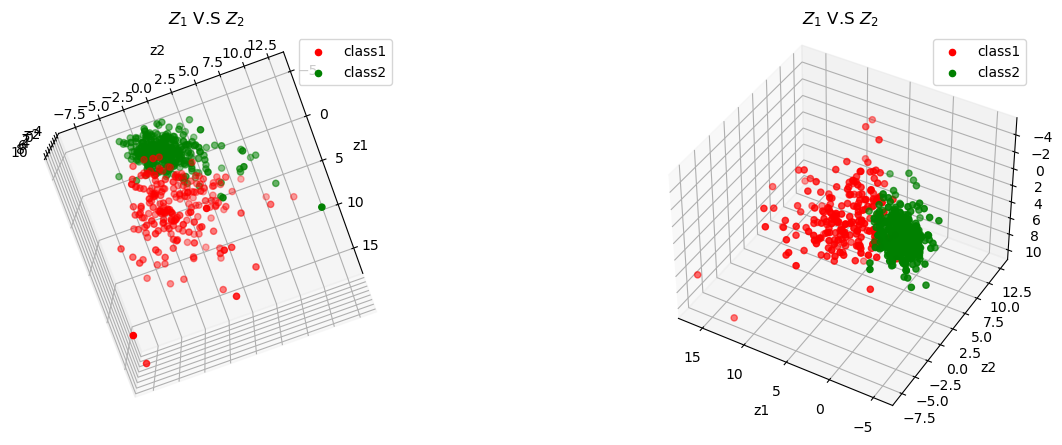

In [166]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer = StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard = Standardlizer.transform(breast_cancer_X)

pca = PCA(n_components=3)
pca.fit(breast_cancer_standard)
X = pca.transform(breast_cancer_standard)
X=pd.DataFrame(X)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), subplot_kw={'projection': '3d'})

class_1=X.loc[breast_cancer_y==0]
class_2=X.loc[breast_cancer_y==1]

axs[0].scatter(class_1[0],class_1[1],class_1[2],c="r",label="class1")
axs[0].scatter(class_2[0],class_2[1],class_2[2],c="g",label="class2")

axs[0].legend()
axs[0].set_xlabel('z1')
axs[0].set_ylabel('z2')
axs[0].grid()
axs[0].set_title("$Z_1$ V.S $Z_2$")
axs[0].view_init(100,-20)

axs[1].scatter(class_1[0],class_1[1],class_1[2],c="r",label="class1")
axs[1].scatter(class_2[0],class_2[1],class_2[2],c="g",label="class2")
axs[1].legend()
axs[1].set_xlabel('z1')
axs[1].set_ylabel('z2')
axs[1].grid()
axs[1].set_title("$Z_1$ V.S $Z_2$")

axs[1].view_init(-140, 60)


特徵值占比: [0.44272026 0.18971182 0.09393163]
特徵值: [13.30499079  5.7013746   2.82291015]
特徵向量: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611304  0.15189161
   0.06016536 -0.03476751  0.19034877  0.36657546 -0.10555215  0.08997968
  -0.08945724 -0.15229263  0.20443045  0.23271591  0.19720729  0.13032155
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230436  0.14359318  0.09796411 -0.00825725  0.14188335  0.27533946]
 [-0.00853128  0.06454991 -0.00931425  0.02869951 -0.10429208 -0.07409158
   0.00273393 -0.02556343 -0.04023996 -0.02257395  0.2684814   0.37463368
   0.2666454   0.216

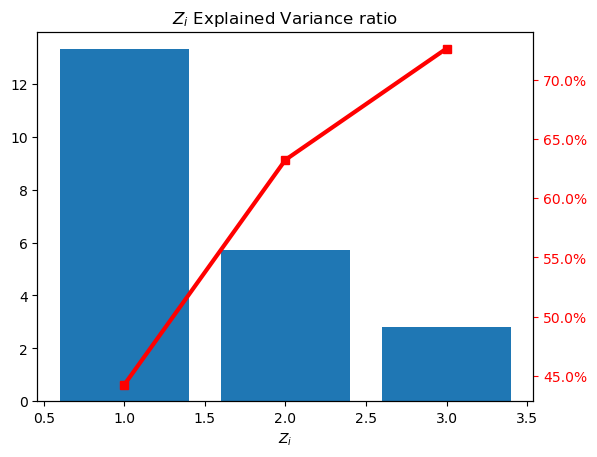

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer = StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard = Standardlizer.transform(breast_cancer_X)

pca = PCA(n_components=3)
pca.fit(breast_cancer_standard)
X = pca.transform(breast_cancer_standard)
X=pd.DataFrame(X)

print("特徵值占比:",pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
print("特徵值:",pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
print("特徵向量:",pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eig_ratio = pca.explained_variance_ratio_
eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column 
eig_index=np.arange(1,1+len(eigvals),1)

fig , ax =plt.subplots()
ax.bar(x=eig_index , height=eigvals)
ax2 = ax.twinx()
ax2.plot(eig_index, eig_ratio.cumsum()*100, \
marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title("$Z_i$ Explained Variance ratio")
ax.set_xlabel("$Z_i$")
plt.show()


# 6. $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，
# 可否從 $Z_1$ 與 $Z_2$ 的組成係數，如式 (10)，看出原變數哪個比較重要？
# 哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。
# 解釋同第一題，可從直方圖得到對 Z1 影響最高的變數

特徵值占比: [0.44272026 0.18971182]
特徵值: [13.30499079  5.7013746 ]
特徵向量: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


<BarContainer object of 30 artists>

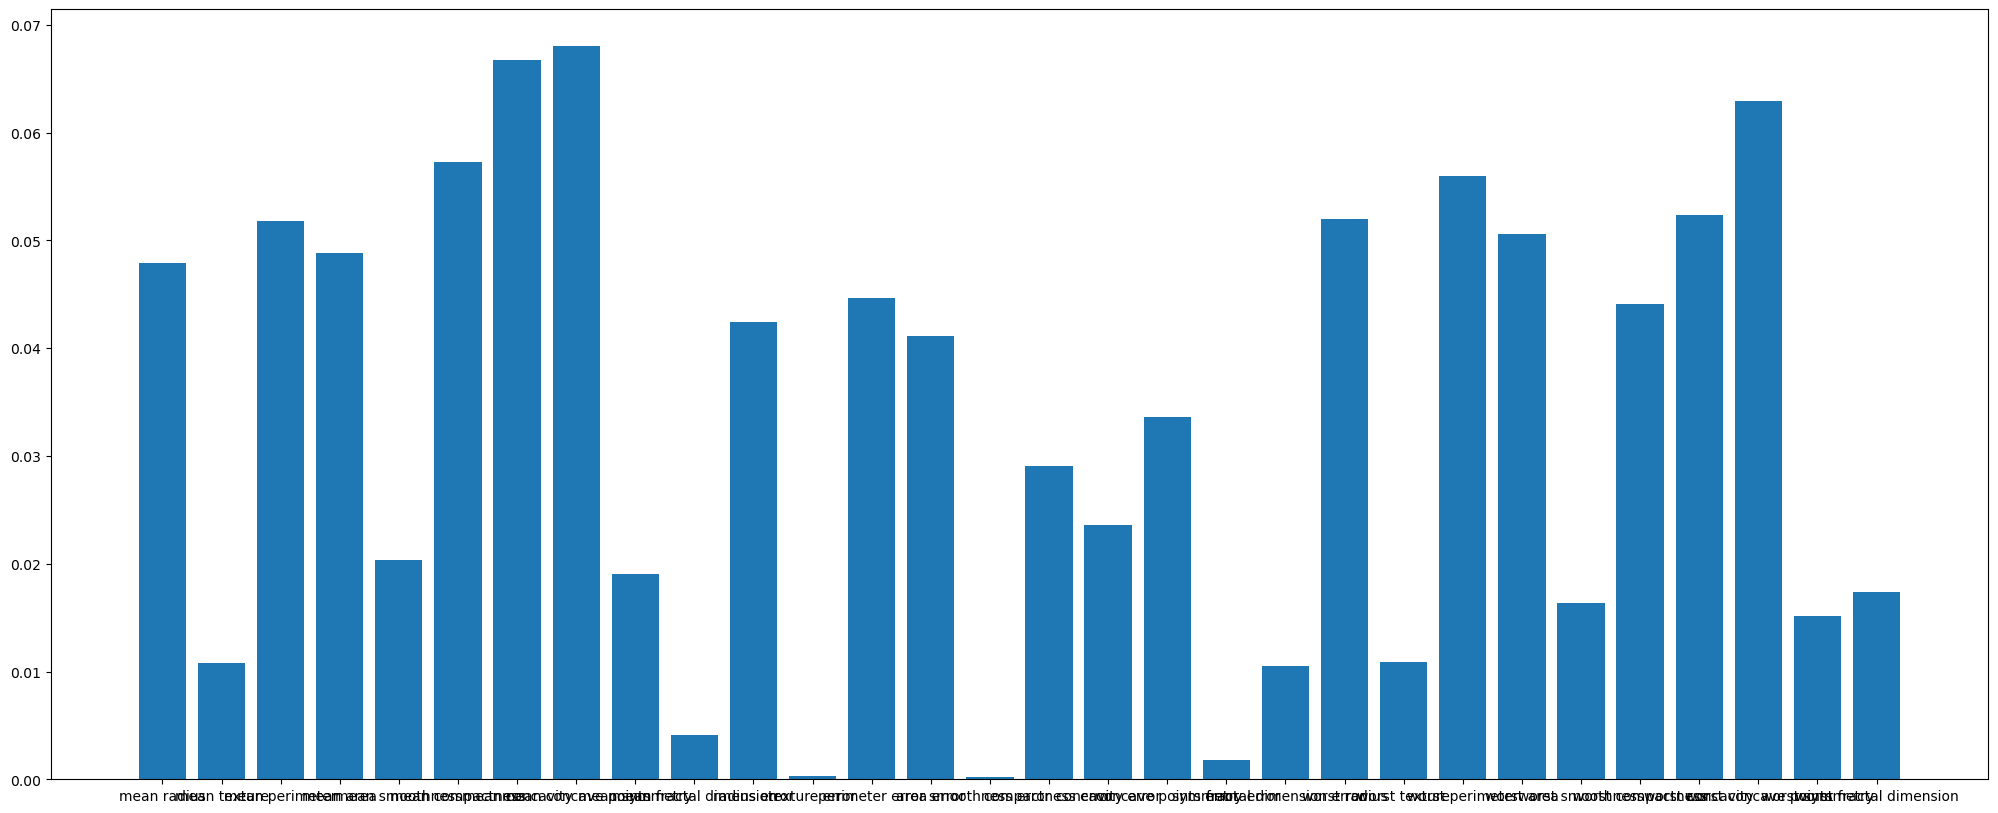

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

#--------------read data-------------------

breast_cancer = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer.data, breast_cancer.target

# 將資料轉換為 dataframe
df_breast_cancer_X = pd.DataFrame(breast_cancer_X, columns=breast_cancer.feature_names)
df_breast_cancer_y = pd.DataFrame(breast_cancer_y, columns=["target"])

# 合併資料
df_breast_cancer = pd.concat([df_breast_cancer_X, df_breast_cancer_y], axis=1)

#------------standardize------------------

# mu_wine=np.mean(wine,axis=0)
# var_wine=np.var(wine,axis=0)
# Z_wine=(wine-mu_wine)/np.sqrt(var_wine)

Standardlizer = StandardScaler()
Standardlizer.fit(breast_cancer_X)
breast_cancer_standard = Standardlizer.transform(breast_cancer_X)

pca = PCA(n_components=2)
pca.fit(breast_cancer_standard)
X = pca.transform(breast_cancer_standard)
X=pd.DataFrame(X)


print("特徵值占比:",pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
print("特徵值:",pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
print("特徵向量:",pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eig_ratio = pca.explained_variance_ratio_
eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column 
eig_index=np.arange(1,1+len(eigvals),1)

loadings = pca.components_[0].reshape((30,))
importance = (loadings ** 2)


# fig ,ax =plt.subplots(figsize=(25,10))
eig_index= wine.columns
# ax.bar(x=eig_index , height=abs(eigvecs[:,0]))

fig ,ax =plt.subplots(figsize=(25,10))
eig_index= df_breast_cancer_X.columns
ax.bar(x=eig_index , height=importance)
